# 立法會大會數據統計

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%matplotlib inline

原數據：

In [3]:
legco_cm = pd.read_csv('./cm/legco_cm_summary2.csv')
legco_cm.head()

,vote-id,vote-date,vote-time,motion,mover,mover-type,result,梁君彥,涂謹申,梁耀忠,...,overall-vote,overall-yes,overall-no,overall-abstain,梁國雄,羅冠聰,姚松炎,劉小麗,梁頌恆,游蕙禎
0,20190515001,16/05/2019,10:34:10,《2019年撥款條例草案》 - 全體委員會審議 - 總目21的修正案 (修正案編號1),胡志偉,Member,Negatived,Present,Absent,Yes,...,50,22,28,0,NaN,NaN,NaN,NaN,NaN,NaN
1,20190515002,16/05/2019,10:39:52,縮短點名表決響鐘時間的議案,李慧琼,Member,Passed,Present,Absent,No,...,50,28,22,0,NaN,NaN,NaN,NaN,NaN,NaN
2,20190515003,16/05/2019,10:41:42,《2019年撥款條例草案》 - 全體委員會審議 - 總目22的修正案 (修正案編號2),鄺俊宇,Member,Negatived,Present,Absent,Yes,...,48,22,24,2,NaN,NaN,NaN,NaN,NaN,NaN
3,20190515004,16/05/2019,10:43:19,《2019年撥款條例草案》 - 全體委員會審議 - 總目33的修正案 (修正案編號3),朱凱廸,Member,Negatived,Present,Absent,Yes,...,52,16,30,6,NaN,NaN,NaN,NaN,NaN,NaN
4,20190515005,16/05/2019,10:44:54,《2019年撥款條例草案》 - 全體委員會審議 - 總目42的修正案 (修正案編號4),陳志全,Member,Negatived,Present,Absent,Yes,...,52,10,30,12,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
legco_cm.dtypes

vote-id      object
vote-date    object
vote-time    object
motion       object
mover        object
              ...  
羅冠聰          object
姚松炎          object
劉小麗          object
梁頌恆          object
游蕙禎          object
Length: 97, dtype: object

## 出席率及投票率

平均一次投票參與人數：

In [5]:
legco_cm['overall-present'].mean()

52.61971830985915

平均投票人數：（主席不投票）

In [6]:
legco_cm['overall-vote'].mean()

52.19934994582882

平均棄權票

In [7]:
legco_cm['overall-abstain'].mean()

3.679306608884074

## 動議通過率

In [8]:
passed = (legco_cm['result'] == 'Passed').sum()
print(f'Number of motion: {legco_cm.shape[0]}')
print(f'Number of motion passed: {passed}')
print(f'Rate of motion passed: {passed / legco_cm.shape[0]:.3f}')

Number of motion: 923
Number of motion passed: 271
Rate of motion passed: 0.294


紀錄中把動議分為立法會成員及公務員兩種。

In [9]:
legco_cm['mover-type'].unique()

array(['Member', 'Public Officer'], dtype=object)

In [10]:
member_motion = legco_cm[(legco_cm['mover-type']=='Member')].result.count()
member_motion_passed = legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].result.count()
gov_motion = legco_cm[(legco_cm['mover-type']=='Public Officer')].result.count()
gov_motion_passed = legco_cm[(legco_cm['mover-type']=='Public Officer') & (legco_cm['result']=='Passed')].result.count()

print(f"由議員提出的議案：{member_motion}，獲得通過：{member_motion_passed}，通過率：{member_motion_passed / member_motion:.3f}")
print(f"由政府提出的議案：{gov_motion}，獲得通過：{gov_motion_passed}，通過率：{gov_motion_passed / gov_motion:.3f}")

由議員提出的議案：789，獲得通過：138，通過率：0.175
由政府提出的議案：134，獲得通過：133，通過率：0.993


### 唯一被立法會否決由政府提出的議案

In [11]:
legco_cm[(legco_cm['mover-type']=='Public Officer') & (legco_cm['result']=='Negatived')]

,vote-id,vote-date,vote-time,motion,mover,mover-type,result,梁君彥,涂謹申,梁耀忠,...,overall-vote,overall-yes,overall-no,overall-abstain,梁國雄,羅冠聰,姚松炎,劉小麗,梁頌恆,游蕙禎
263,20180207002,08/02/2018,12:54:50,《2017年應課稅品(修訂)條例草案》 - 全體委員會審議 - 食物及衞生局局長的第二組修正...,食物及衞生局局長,Public Officer,Negatived,Present,No,Absent,...,41,12,29,0,NaN,NaN,NaN,NaN,NaN,NaN


投票結果：

In [12]:
oops = legco_cm[(legco_cm['mover-type']=='Public Officer') & (legco_cm['result']=='Negatived')]
oops[['motion', 'mover', 'overall-vote', 'overall-yes', 'overall-no']]

,motion,mover,overall-vote,overall-yes,overall-no
263,《2017年應課稅品(修訂)條例草案》 - 全體委員會審議 - 食物及衞生局局長的第二組修正...,食物及衞生局局長,41,12,29


有關動議及發言：
https://www.info.gov.hk/gia/general/201802/07/P2018020700996.htm

## 曾經動議的議員：

In [13]:
print(legco_cm[(legco_cm['mover-type']=='Member')].mover.unique())
print(len(legco_cm[(legco_cm['mover-type']=='Member')].mover.unique()), '人')

['胡志偉' '李慧琼' '鄺俊宇' '朱凱廸' '陳志全' '區諾軒' '范國威' '林卓廷' '譚文豪' '郭家麒' '楊岳橋' '鄭松泰'
 '毛孟靜' '葉建源' '許智峯' '尹兆堅' '李國麟' '梁美芬' '梁志祥' '郭偉强' '吳永嘉' '蔣麗芸' '張超雄' '劉小麗'
 '田北辰' '黃國健' '葉劉淑儀' '張國鈞' '陳恒鑌' '陳克勤' '梁繼昌' '涂謹申' '葛珮帆' '邵家輝' '易志明' '謝偉俊'
 '陳淑莊' '郭榮鏗' '梁耀忠' '邵家臻' '盧偉國' '謝偉銓' '麥美娟' '柯創盛' '何君堯' '莫乃光' '潘兆平' '周浩鼎'
 '黃碧雲' '廖長江' '何啟明' '陸頌雄' '容海恩' '陳凱欣' '陳沛然' '姚松炎' '林健鋒' '劉國勳' '張華峰' '羅冠聰'
 '梁國雄' '張宇人' '姚思榮' '陳健波' '黃定光' '鄭泳舜' '馬逢國' '何俊賢']
68 人


動議數、通過 / 否決數

In [14]:
move_count = legco_cm[(legco_cm['mover-type']=='Member')].groupby('mover').size().reset_index(name='counts').sort_values('counts')
move_pass = legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].groupby('mover').size().reset_index(name='passed')
move_neg = legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Negatived')].groupby('mover').size().reset_index(name='negatived')
move_count = pd.merge(move_count, move_pass, on='mover', how='outer')
move_count = pd.merge(move_count, move_neg, on='mover', how='outer')
move_count[['passed', 'negatived']] = move_count[['passed', 'negatived']].fillna(0).astype('int')
move_count

,mover,counts,passed,negatived
0,何俊賢,1,0,1
1,鄭泳舜,1,1,0
2,陳凱欣,1,1,0
3,張宇人,1,1,0
4,潘兆平,1,0,1
...,...,...,...,...
63,區諾軒,28,2,26
64,郭家麒,32,1,31
65,張超雄,36,3,33
66,朱凱廸,47,0,47


### 動議完全沒有獲通過的議員

In [15]:
loser = []
for name in legco_cm[(legco_cm['mover-type']=='Member')].mover.unique():
    if name not in legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].mover.unique():
        loser.append(name)

print('Loser name list: ', loser)
print(len(loser), '人')

Loser name list:  ['朱凱廸', '陳志全', '范國威', '林卓廷', '楊岳橋', '鄭松泰', '許智峯', '劉小麗', '涂謹申', '柯創盛', '何君堯', '潘兆平', '姚松炎', '羅冠聰', '梁國雄', '何俊賢']
16 人


In [16]:
move_count[move_count['mover'].isin(loser)]

,mover,counts,passed,negatived
0,何俊賢,1,0,1
4,潘兆平,1,0,1
5,何君堯,2,0,2
13,柯創盛,3,0,3
15,姚松炎,3,0,3
42,鄭松泰,8,0,8
46,范國威,11,0,11
49,許智峯,12,0,12
51,林卓廷,15,0,15
54,楊岳橋,17,0,17


### 最少有一個動議獲通過的議員

In [17]:
print(legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].mover.unique())
print(len(legco_cm[(legco_cm['mover-type']=='Member') & (legco_cm['result']=='Passed')].mover.unique()), '人')

['李慧琼' '李國麟' '梁美芬' '郭偉强' '黃國健' '葉劉淑儀' '張國鈞' '陳恒鑌' '陳克勤' '葛珮帆' '鄺俊宇' '胡志偉'
 '邵家輝' '易志明' '張超雄' '梁志祥' '梁耀忠' '郭家麒' '區諾軒' '邵家臻' '莫乃光' '周浩鼎' '謝偉俊' '廖長江'
 '盧偉國' '何啟明' '陸頌雄' '麥美娟' '葉建源' '梁繼昌' '容海恩' '陳凱欣' '謝偉銓' '陳沛然' '黃碧雲' '尹兆堅'
 '張宇人' '鄭泳舜' '陳淑莊' '劉國勳' '陳健波' '黃定光' '張華峰' '毛孟靜' '譚文豪' '田北辰' '姚思榮' '蔣麗芸'
 '吳永嘉' '林健鋒' '馬逢國' '郭榮鏗']
52 人


In [18]:
move_count[~move_count['mover'].isin(loser)]

,mover,counts,passed,negatived
1,鄭泳舜,1,1,0
2,陳凱欣,1,1,0
3,張宇人,1,1,0
6,劉國勳,2,1,1
7,馬逢國,2,1,1
8,陳沛然,2,2,0
9,陳健波,2,1,1
10,姚思榮,3,2,1
11,廖長江,3,3,0
12,張國鈞,3,2,1


## 個別議員投票統計

In [19]:
members = ['梁君彥', '涂謹申', '梁耀忠', '石禮謙', '張宇人', '李國麟', '林健鋒', '黃定光', '李慧琼',
           '陳克勤', '陳健波', '梁美芬', '黃國健', '葉劉淑儀', '謝偉俊', '毛孟靜', '田北辰', '何俊賢',
           '易志明', '胡志偉', '姚思榮', '馬逢國', '莫乃光', '陳志全', '陳恒鑌', '梁志祥', '梁繼昌', 
           '麥美娟', '郭家麒', '郭偉强', '郭榮鏗', '張華峰', '張超雄', '黃碧雲', '葉建源', '葛珮帆', 
           '廖長江', '潘兆平', '蔣麗芸', '盧偉國', '鍾國斌', '楊岳橋', '尹兆堅', '朱凱廸', '吳永嘉', 
           '何君堯', '何啟明', '林卓廷', '周浩鼎', '邵家輝', '邵家臻', '柯創盛', '容海恩', '陳沛然', 
           '陳振英', '陳淑莊', '張國鈞', '許智峯', '陸頌雄', '劉國勳', '劉業強', '鄭松泰', '鄺俊宇', 
           '譚文豪', '范國威', '區諾軒', '鄭泳舜', '謝偉銓', '陳凱欣', '梁國雄', '羅冠聰', '姚松炎', 
           '劉小麗', '梁頌恆', '游蕙禎']
# df = legco_cm.groupby('何君堯').size() + legco_cm.groupby('張宇人').size()
df = pd.DataFrame([legco_cm.groupby(member).size() for member in members])
df.fillna(0).astype('int')
df['member'] = members
df['vote_num'] = df.fillna(0)['Yes'] + df.fillna(0)['No'] + df.fillna(0)['Abstain']
df['vote_rate'] = df['vote_num'] / (df['vote_num'] + df.fillna(0)['Present'] + df.fillna(0)['Absent']) * 100
df.sort_values('vote_rate').head(20).fillna(0)

,Absent,Present,Abstain,No,Yes,member,vote_num,vote_rate
0,24.0,899.0,0.0,0.0,0.0,梁君彥,0.0,0.000000
73,1.0,0.0,0.0,0.0,0.0,梁頌恆,0.0,0.000000
74,1.0,0.0,0.0,0.0,0.0,游蕙禎,0.0,0.000000
71,189.0,0.0,7.0,49.0,62.0,姚松炎,118.0,38.436482
30,472.0,1.0,22.0,112.0,316.0,郭榮鏗,450.0,48.754063
3,449.0,3.0,8.0,333.0,130.0,石禮謙,471.0,51.029252
1,420.0,19.0,46.0,95.0,343.0,涂謹申,484.0,52.437703
60,413.0,0.0,11.0,375.0,124.0,劉業強,510.0,55.254605
16,399.0,0.0,37.0,309.0,178.0,田北辰,524.0,56.771398
14,380.0,2.0,18.0,329.0,194.0,謝偉俊,541.0,58.613218


## 把投票統計和動議統計結合就成為議員的一個簡單成積表

In [20]:
member_summary = pd.merge(move_count, df[['Absent', 'Present', 'vote_num', 'vote_rate', 'member']], 
                          right_on='member', 
                          left_on='mover', 
                          how='outer')
member_summary.drop(columns=['mover']).sort_values('Absent').tail(15)

,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member
55,17.0,5.0,12.0,303.0,5.0,615.0,66.630553,尹兆堅
37,7.0,1.0,6.0,304.0,NaN,619.0,67.063922,葉建源
32,6.0,3.0,3.0,317.0,NaN,606.0,65.655471,邵家臻
50,13.0,2.0,11.0,326.0,15.0,582.0,63.055255,陳淑莊
7,2.0,1.0,1.0,328.0,NaN,595.0,64.463705,馬逢國
8,2.0,2.0,0.0,339.0,NaN,584.0,63.271939,陳沛然
49,12.0,0.0,12.0,349.0,7.0,567.0,61.430119,許智峯
22,4.0,2.0,2.0,377.0,1.0,545.0,59.046587,李國麟
70,NaN,NaN,NaN,378.0,NaN,545.0,59.046587,鍾國斌
27,5.0,1.0,4.0,380.0,2.0,541.0,58.613218,謝偉俊


### 這樣就能找出完全沒有動議的議員

In [21]:
member_summary.fillna(0).sort_values(['counts', 'Absent'], ascending=(True, False)).head(10)

,mover,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member
69,0,0.0,0.0,0.0,449.0,3.0,471.0,51.029252,石禮謙
72,0,0.0,0.0,0.0,413.0,0.0,510.0,55.254605,劉業強
70,0,0.0,0.0,0.0,378.0,0.0,545.0,59.046587,鍾國斌
68,0,0.0,0.0,0.0,24.0,899.0,0.0,0.000000,梁君彥
71,0,0.0,0.0,0.0,23.0,3.0,897.0,97.183099,陳振英
73,0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,梁頌恆
74,0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,游蕙禎
3,張宇人,1.0,1.0,0.0,217.0,1.0,705.0,76.381365,張宇人
0,何俊賢,1.0,0.0,1.0,115.0,0.0,808.0,87.540628,何俊賢
4,潘兆平,1.0,0.0,1.0,50.0,2.0,871.0,94.366197,潘兆平


能看得出 劉業強、鍾國斌、石禮謙、不但完全沒動議，連投票率也不到 60%

### 參與投票最多的議員：

In [22]:
member_summary.fillna(0).sort_values('vote_num', ascending=False).head(10)

,mover,counts,passed,negatived,Absent,Present,vote_num,vote_rate,member
48,盧偉國,11.0,7.0,4.0,11.0,0.0,912.0,98.808234,盧偉國
71,0,0.0,0.0,0.0,23.0,3.0,897.0,97.183099,陳振英
40,葛珮帆,7.0,6.0,1.0,36.0,0.0,887.0,96.099675,葛珮帆
4,潘兆平,1.0,0.0,1.0,50.0,2.0,871.0,94.366197,潘兆平
13,柯創盛,3.0,0.0,3.0,56.0,0.0,867.0,93.932828,柯創盛
10,姚思榮,3.0,2.0,1.0,61.0,0.0,862.0,93.391116,姚思榮
19,黃定光,4.0,2.0,2.0,60.0,1.0,862.0,93.391116,黃定光
25,陳克勤,5.0,4.0,1.0,61.0,0.0,862.0,93.391116,陳克勤
26,邵家輝,5.0,1.0,4.0,61.0,0.0,862.0,93.391116,邵家輝
21,周浩鼎,4.0,1.0,3.0,61.0,0.0,862.0,93.391116,周浩鼎


## 從 Wikipedia 上找到各個議員的所屬政黨

In [23]:
from bs4 import BeautifulSoup

In [24]:
with open('./party.html', 'r') as f:
    party = f.read()
party_soup = BeautifulSoup(party, 'html.parser')
tr = party_soup.find_all('tr')
tr_text = []
for i in tr:
    j = i.text.strip().split('\n\n')
    a = j[0].split('\n')[-1]
    b = j[-1].split('\n')[0]
    tr_text.append([a, b])
tr_text.remove(['備註', '席位'])
tr_text.remove(['懸空', ''])
for _ in range(3):
    tr_text.remove(['懸空', '懸空'])
party_pd = pd.DataFrame(tr_text)
# correct error due to format
party_pd.loc[party_pd[0] == '吳永嘉', 1] = '經民聯'
party_pd.loc[party_pd[0] == '邵家輝', 1] = '自由黨'
# add missing members
missing = pd.DataFrame([{0: '張華峰', 1: '經民聯'},
 {0: '何啟明', 1: '工聯會'},
 {0: '范國威', 1: '香港本土'},
 {0: '區諾軒', 1: '獨立民主派'},
 {0: '梁國雄', 1: '社民連'}, 
 {0: '羅冠聰', 1: '眾志'},
 {0: '姚松炎', 1: '專業議政'},
 {0: '劉小麗', 1: '工黨'}, 
 {0: '梁頌恆', 1: '青年新政'},
 {0: '游蕙禎', 1: '青年新政'}
])
party_pd = party_pd.append(missing, ignore_index=True)
party_pd.replace('公民黨/專業議政', '公民黨', inplace=True)
party_pd.replace('教協/專業議政', '專業議政', inplace=True)
party_pd.replace('民建聯/新界社團聯會', '民建聯', inplace=True)
party_pd.replace('新民黨/公民力量', '新民黨', inplace=True)
party_pd.replace('公專聯/專業議政', '公專聯', inplace=True)
party_pd.replace('經民聯/西九新動力', '經民聯', inplace=True)

In [25]:
party_pd[1].unique()

array(['新民黨', '工聯會', '民主黨', '民建聯', '公民黨', '經民聯', '香港本土', '獨立建制派', '獨立民主派',
       '實政圓桌', '熱血公民', '工黨', '人民力量', '自由黨', '專業議政', '公專聯', '獨立中間派', '勞聯',
       '新論壇', '街工', '社民連', '眾志', '青年新政'], dtype=object)

# 議員投票傾向分析
## 同一政黨內議員的投票方向

### 定義一個評分標準，以對比各政黨的統一性。1 為同一次投票內選擇完全一致（不包括缺席），越分散分數越低。
### 就結果而言 Yes 和 No 及 Abstain 是對立的，但 No 和 Abstain 雖然立場有不同但做成結果一致，所以把 Yes-No 和 Yes-Abstain 的比重設成 2，而 No-Abstain則設成 0.5。把 function 寫成可以改變比重的模式方便日後調整。

In [26]:
legco_member_vote = legco_cm[members]

def diff_vote(inputList, weight=[2, 2, 0.5]):
    yes = 0
    no = 0
    abstain = 0
    for vote in inputList:
        if vote == 'Yes':
            yes += 1
        elif vote == 'No':
            no += 1
        elif vote == 'Abstain':
            abstain += 1
    if (yes**2 + no**2 + abstain**2) > 0:
        diff = 1 - (weight[0] * (yes * no) + weight[2] * (no * abstain) + weight[1] * (yes * abstain)) / (yes + no + abstain)**2
    else:
        diff = np.nan
    return diff

測試：

In [27]:
party_member_list = list(party_pd.groupby(1).get_group('民建聯')[0])
test = []
for i in range(legco_member_vote.shape[0]):
    diff = diff_vote(legco_member_vote[(member for member in legco_member_vote.columns if member in party_member_list)].loc[i])
    test.append(diff)
legco_cm['民建聯'] = test
print(legco_cm['民建聯'].describe())
legco_cm[legco_cm['民建聯'] < 1][[member for member in legco_cm.columns if member in party_member_list]+['motion']]

count    923.000000
mean       0.998910
std        0.014140
min        0.739645
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: 民建聯, dtype: float64


,黃定光,李慧琼,陳克勤,何俊賢,陳恒鑌,梁志祥,葛珮帆,蔣麗芸,周浩鼎,柯創盛,張國鈞,劉國勳,鄭泳舜,motion
97,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,No,Abstain,Abstain,根據《立法會(權力及特權)條例》動議的議案
125,Abstain,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,縮短點名表決響鐘時間的議案
463,No,No,Yes,No,No,No,No,Absent,Absent,No,No,No,NaN,《2017年撥款條例草案》 - 全體委員會審議階段 - 總目90的修正案 (修正案編號72)
603,No,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Absent,Abstain,Abstain,郭家麒議員對何君堯議員的「活化強制性公積金」議案作出的修正案
730,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Abstain,Yes,Yes,陸頌雄議員對何啟明議員的「全面檢討勞工法例，改善勞工權益」議案作出的修正案
786,Absent,Absent,Yes,Abstain,Yes,Yes,Yes,Yes,Yes,Yes,Absent,Absent,Yes,修訂《2018年食物攙雜(金屬雜質含量)(修訂)規例》的擬議決議案
828,No,No,No,No,No,No,No,No,No,No,No,No,Yes,《國歌條例草案》 - 全體委員會審議 - 陳志全議員的第十四及十五項修正案 (修正案編號18...


In [28]:
party_member_list = list(party_pd.groupby(1).get_group('新民黨')[0])
test = []
for i in range(legco_member_vote.shape[0]):
    diff = diff_vote(legco_member_vote[(member for member in legco_member_vote.columns if member in party_member_list)].loc[i])
    test.append(diff)
legco_cm['新民黨'] = test
print(legco_cm['新民黨'].describe())
legco_cm[legco_cm['新民黨'] < 1][[member for member in legco_cm.columns if member in party_member_list]+['motion']]

count    867.000000
mean       0.999423
std        0.016981
min        0.500000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: 新民黨, dtype: float64


,葉劉淑儀,容海恩,motion
292,No,Yes,尹兆堅議員對謝偉俊議員的「制訂房屋政策 紓緩殷切住屋需求」議案作出的修正案


由於每一個政黨都要把投票不一的議題列出太貼位置，把迴圈修改為列出 index。

In [29]:
party_vote_summary = []

for party in party_pd[1].unique():
    party_member_list = list(party_pd.groupby(1).get_group(party)[0])
    test = []
    diff_list = []
    for i in range(legco_member_vote.shape[0]):
        diff = diff_vote(legco_member_vote[(member for member in legco_member_vote.columns if member in party_member_list)].loc[i])
        test.append(diff)
        if diff < 1:
            diff_list.append(i)
    legco_cm[party] = test
    party_vote = {'party-name': party,
                  'num-members': len([member for member in legco_member_vote.columns if member in party_member_list]),
                  'involed-num-motion': legco_cm[party].count(), 
                  'num-motion-not-unify': len(diff_list),
                  'motion-list': diff_list,
                  'score-mean': legco_cm[party].mean(),
                  'score-sd': legco_cm[party].std()
                 }
    party_vote_summary.append(party_vote)

party_vote_summary_df = pd.DataFrame(party_vote_summary)
party_vote_summary_df[party_vote_summary_df['num-members'] > 1].sort_values('score-mean')
#     print(legco_cm[legco_cm[party] < 1][[member for member in legco_cm.columns if member in party_member_list]+['motion']])

,party-name,num-members,involed-num-motion,num-motion-not-unify,motion-list,score-mean,score-sd
8,獨立民主派,4,864,201,"[8, 9, 11, 12, 13, 14, 15, 16, 17, 18, 19, 22,...",0.904245,0.182354
7,獨立建制派,8,918,143,"[2, 63, 71, 72, 73, 75, 76, 77, 78, 86, 87, 88...",0.957347,0.117170
15,公專聯,2,739,46,"[8, 35, 45, 48, 93, 94, 110, 167, 211, 272, 29...",0.975981,0.102756
5,經民聯,8,923,69,"[65, 71, 76, 87, 88, 95, 97, 99, 105, 145, 146...",0.984435,0.068563
6,香港本土,2,751,26,"[601, 609, 610, 611, 612, 628, 638, 639, 719, ...",0.985186,0.082972
14,專業議政,2,639,21,"[65, 66, 72, 155, 287, 288, 289, 291, 295, 296...",0.988850,0.069268
11,工黨,2,727,15,"[65, 66, 72, 81, 283, 292, 294, 389, 555, 588,...",0.993810,0.050441
13,自由黨,4,923,14,"[0, 86, 87, 88, 112, 210, 261, 272, 395, 611, ...",0.996336,0.035309
2,民主黨,7,829,9,"[55, 214, 215, 216, 217, 284, 285, 399, 837]",0.996820,0.033502
4,公民黨,5,877,6,"[79, 270, 720, 797, 800, 810]",0.997817,0.027980


### 接下來把泛民和建制兩大陣營也算一下
分類根據 wikipedia 對建制和泛民的定義

In [30]:
chi = ['民建聯', '工聯會', '經民聯', '自由黨', '新民黨', '實政圓桌', '新論壇', '勞聯']
rice = ['民主黨', '公民黨', '工黨', '街工', '公專聯', '人民力量', '社民連']

In [31]:
def getPartyMember(partyList):
    memberList = []
    for party in partyList:
        memberList += list(party_pd.groupby(1).get_group(party)[0])
    return memberList

In [32]:
side_vote_summary = []
side = [{'name': '建制', 'party-list': chi}, 
        {'name': '泛民', 'party-list': rice}
        ]

for s in side:
    party_member_list = getPartyMember(s['party-list'])
    test = []
    diff_list = []
    for i in range(legco_member_vote.shape[0]):
        diff = diff_vote(legco_member_vote[(member for member in legco_member_vote.columns if member in party_member_list)].loc[i])
        test.append(diff)
        if diff < 1:
            diff_list.append(i)
    legco_cm[s['name']] = test
    party_vote = {'party-name': s['name'],
                  'num-members': len([member for member in legco_member_vote.columns if member in party_member_list]),
                  'involed-num-motion': legco_cm[s['name']].count(), 
                  'num-motion-not-unify': len(diff_list),
                  'motion-list': diff_list,
                  'score-mean': legco_cm[s['name']].mean(),
                  'score-sd': legco_cm[s['name']].std()
                  }
    side_vote_summary.append(party_vote)

也把立法會全體成員加進去作參考

In [33]:
test = []
diff_list = []
for i in range(legco_member_vote.shape[0]):
    diff = diff_vote(legco_member_vote[(member for member in legco_member_vote.columns)].loc[i])
    test.append(diff)
    if diff < 1:
        diff_list.append(i)
legco_cm['立法會全體'] = test
party_vote = {'party-name': '立法會全體',
              'num-members': len([member for member in legco_member_vote.columns]),
              'involed-num-motion': legco_cm['立法會全體'].count(), 
              'num-motion-not-unify': len(diff_list),
              'motion-list': diff_list,
              'score-mean': legco_cm['立法會全體'].mean(),
              'score-sd': legco_cm['立法會全體'].std()
              }
side_vote_summary.append(party_vote)

In [34]:
side_summary_df = pd.DataFrame(side_vote_summary)
side_summary_df

,party-name,num-members,involed-num-motion,num-motion-not-unify,motion-list,score-mean,score-sd
0,建制,35,923,219,"[0, 60, 61, 62, 63, 64, 65, 71, 72, 73, 74, 75...",0.938258,0.135194
1,泛民,19,922,339,"[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, ...",0.879992,0.183805
2,立法會全體,75,923,887,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.635670,0.137720


## 動議投票時間分怖

In [35]:
legco_cm['vote-date'] = pd.to_datetime(legco_cm['vote-date'])
legco_cm['vote-time'] = pd.to_datetime(legco_cm['vote-time']).dt.time
legco_cm[['vote-id', 'vote-date', 'vote-time', 'mover-type', 'result']].head()

,vote-id,vote-date,vote-time,mover-type,result
0,20190515001,2019-05-16,10:34:10,Member,Negatived
1,20190515002,2019-05-16,10:39:52,Member,Passed
2,20190515003,2019-05-16,10:41:42,Member,Negatived
3,20190515004,2019-05-16,10:43:19,Member,Negatived
4,20190515005,2019-05-16,10:44:54,Member,Negatived


首先看一下政府動議按月份分怖

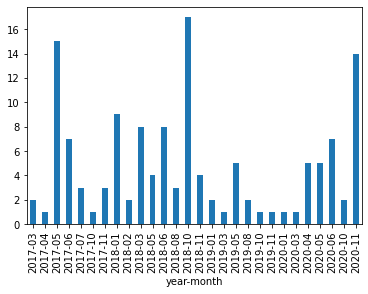

In [37]:
legco_cm['year-month'] = legco_cm['vote-date'].dt.to_period('M')
legco_cm[legco_cm['mover-type'] == 'Public Officer'].groupby('year-month').size().plot(kind='bar')

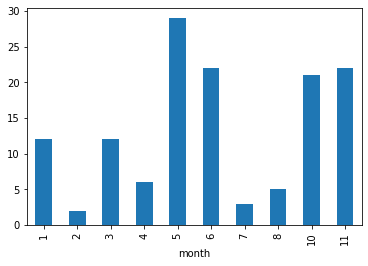

In [38]:
legco_cm['month'] = legco_cm['vote-date'].dt.month
legco_cm[legco_cm['mover-type'] == 'Public Officer'].groupby('month').size().plot(kind='bar')

看來大部份政府議案都在5、6、10、11月提出。

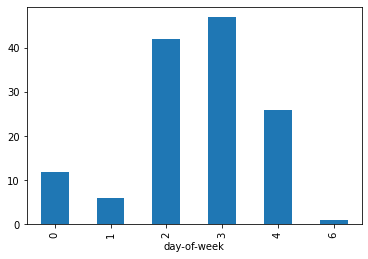

In [39]:
legco_cm['day-of-week'] = legco_cm['vote-date'].dt.dayofweek
legco_cm[legco_cm['mover-type'] == 'Public Officer'].groupby('day-of-week').size().plot(kind='bar')

而且主要是週二、週三，其次是週四。

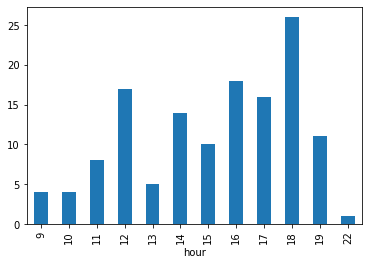

In [46]:
legco_cm['hour'] = pd.to_datetime(legco_cm['vote-time'].astype('str')).dt.hour
legco_cm[legco_cm['mover-type'] == 'Public Officer'].groupby('hour').size().plot(kind='bar')

午飯及晚飯前的動議數字比較高....